## Objective:
The objective of this task is to perform sentiment analysis on a dataset of text data obtained from Kaggle. The goal is to analyze each text and assign a corresponding sentiment label (e.g., positive, negative, or neutral). This task will encompass data cleaning, preprocessing, feature engineering, model selection, and evaluation

## Importing Python Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Collection

In [2]:
Df = pd.read_csv('train.csv', encoding='unicode_escape')
df = Df[['sentiment', 'text']]
df

,sentiment,text
0,neutral,"I`d have responded, if I were going"
1,negative,Sooo SAD I will miss you here in San Diego!!!
2,negative,my boss is bullying me...
3,negative,what interview! leave me alone
4,negative,"Sons of ****, why couldn`t they put them on t..."
...,...,...
27476,negative,wish we could come see u on Denver husband l...
27477,negative,I`ve wondered about rake to. The client has ...
27478,positive,Yay good for both of you. Enjoy the break - y...
27479,positive,But it was worth it ****.


## Data Cleaning & Preprocessing :

In [5]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

## Removing Special Characters 

In [4]:
# Removing the Special Characters
def remove_special_characters(text):
    pattern = r'[^\w\s]'
    clean_text = re.sub(pattern, '', text)
    return clean_text

#applying the function to the desired column
df['text'] = df['text'].apply(str).apply(remove_special_characters)

C:\Users\bb\AppData\Local\Temp\ipykernel_4944\1406543871.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(str).apply(remove_special_characters)


## Handling Missing Values

In [6]:
df.isnull().sum()   # No missing values or NaNs are present in Data

sentiment    0
text         0
dtype: int64

## lowercasing & Tokenizing of the text Data of Sentiment Text DataSet

In [7]:
# Lowercase the text in the Text column
df['text'] = df['text'].str.lower()

# Tokenizing the 'text' column
df['text'] = df['text'].apply(word_tokenize)

C:\Users\bb\AppData\Local\Temp\ipykernel_4944\3453302704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].str.lower()
C:\Users\bb\AppData\Local\Temp\ipykernel_4944\3453302704.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(word_tokenize)


## Removing Stop Words

In [8]:
# Load stop words
stop_words = set(stopwords.words('english'))

# Create a function to remove stop words from the text
def remove_stop_words(text):
    return [word for word in text if word not in stop_words]

# Apply the function to the text column in the DataFrame
df['text'] = df['text'].apply(remove_stop_words)
df['text']

C:\Users\bb\AppData\Local\Temp\ipykernel_4944\1307012266.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(remove_stop_words)


0                                   [id, responded, going]
1                            [sooo, sad, miss, san, diego]
2                                         [boss, bullying]
3                                [interview, leave, alone]
4          [sons, couldnt, put, releases, already, bought]
                               ...                        
27476    [wish, could, come, see, u, denver, husband, l...
27477    [ive, wondered, rake, client, made, clear, net...
27478    [yay, good, enjoy, break, probably, need, hect...
27479                                              [worth]
27480            [flirting, going, atg, smiles, yay, hugs]
Name: text, Length: 27481, dtype: object

## Stemming or Lemmatization.

## I'm Choosing lemmatization tecnique because it gives more accuracy then Stemming according to my RND

In [9]:
#lemmatizing using WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

#Create a Function to perform lemmatization
def lemmatize_text(text):
    return [lemmatizer.lemmatize(word) for word in text ]
# Apply the function to the text column in the DataFrame
df['text'] = df['text'].apply(lemmatize_text)

C:\Users\bb\AppData\Local\Temp\ipykernel_4944\2030646736.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lemmatize_text)


## Data View After Data Cleaning and Preprocessing

In [10]:
df

,sentiment,text
0,neutral,"[id, responded, going]"
1,negative,"[sooo, sad, miss, san, diego]"
2,negative,"[bos, bullying]"
3,negative,"[interview, leave, alone]"
4,negative,"[son, couldnt, put, release, already, bought]"
...,...,...
27476,negative,"[wish, could, come, see, u, denver, husband, l..."
27477,negative,"[ive, wondered, rake, client, made, clear, net..."
27478,positive,"[yay, good, enjoy, break, probably, need, hect..."
27479,positive,[worth]


## Exploratory Data Analysis of Sentiment Text Data

## Visualizations of Word Frequecies

In [11]:
from wordcloud import WordCloud
from collections import Counter

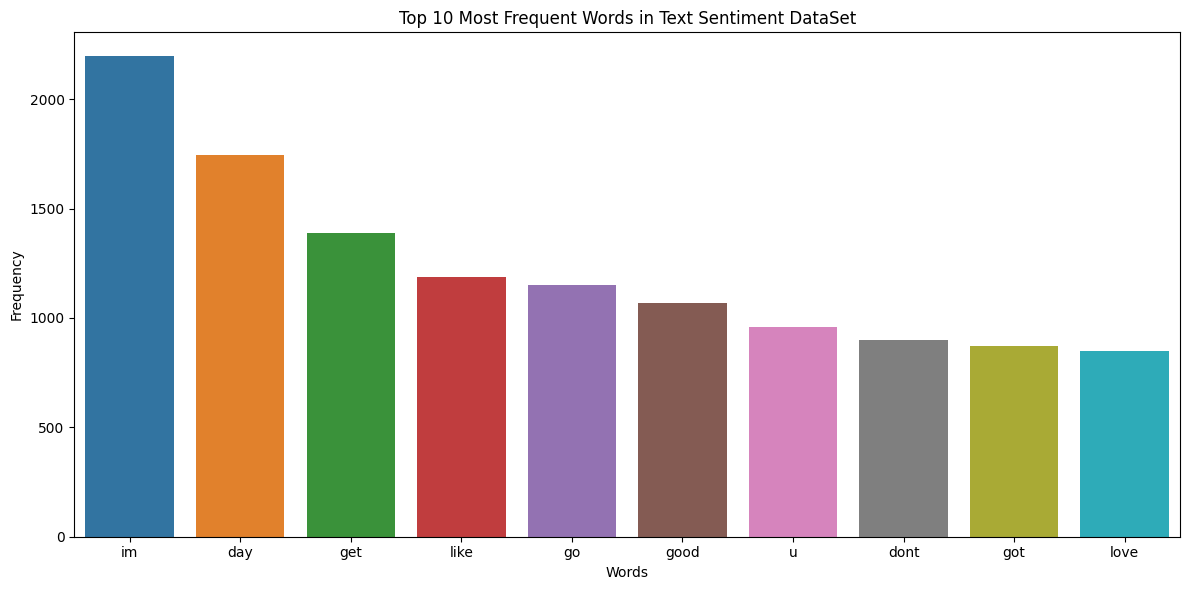

In [12]:

# Combining the Text data for analysis
combine_text =''.join([' '.join(text_list) for text_list in df['text']])

# Calculate word frequencies
words = combine_text.split()
word_freq = Counter(words)

# Coverting word frequecies into DataFrame for Visualizations 
word_freq = pd.DataFrame(word_freq.items(), columns=["Word", "Frequency"])
p = word_freq.sort_values(by='Frequency',ascending=False)
Word=p['Word']
frequency=p['Frequency']

# Create a bar plot of word frequencies
plt.figure(figsize=(12,6))
sns.barplot(x=(Word.head(10)), y=(frequency.head(10))).set(title=f'Top 10 Most Frequent Words in Text Sentiment DataSet')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


## This Barplot is usefull in understanding the key insights of Most Occurred Words of Text Sentiment DataSet as the most occurred word is 'im' .

## Exploratory Data Analysis of Sentiments 

[Text(0.5, 1.0, 'Sentiments Used In Text Sentiment DataSet')]

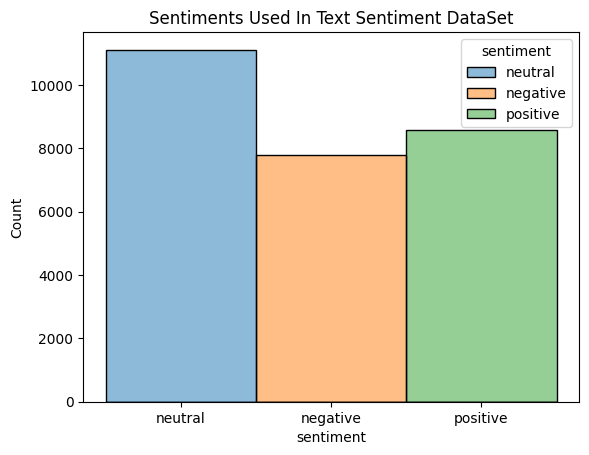

In [13]:
# Visualising the Sentiment Data

sns.histplot(data = df, x = df['sentiment'], hue = 'sentiment').set(title=f'Sentiments Used In Text Sentiment DataSet')

## The Histogram above Shown helps us in knowing about meaningful insights regarding sentiments which is that :

1. Neutral Sentiments are the most Sentiments use in dataset.
2. The 2nd most used Sentiment is Positive Sentiments.
3. Negative Sentiments at 3rd are lowest in number counts.

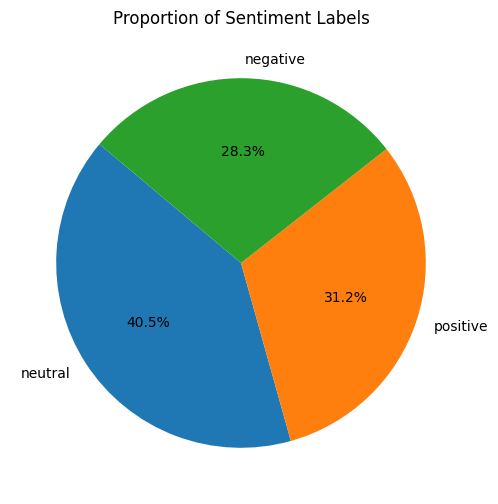

In [14]:
# Create a pie chart to show the proportion of each sentiment label

sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Sentiment Labels')
plt.show()

## Through Pie Chart Of Proportion of Sentiments we become to understand The ratio of Sentiments in Percentage as :

1. Neutral Sentiments are 40.5 %
2. Positive Sentiments are 31.2 %
3. Negative Sentiments are 28.3 %

## Exploratory Data Analysis (EDA) of textual sentiment data by Visualization Through WordCloud

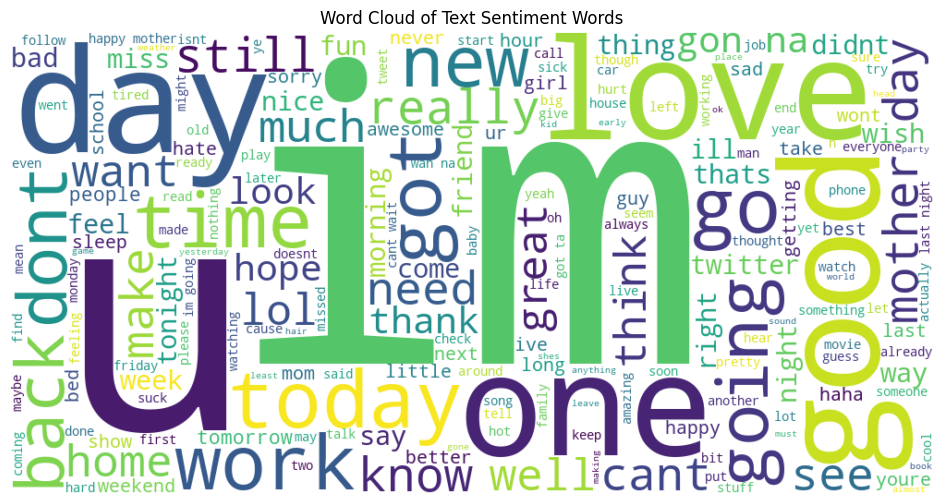

In [15]:
# Generating Word Cloud
wordcloud = WordCloud(width=1000, height=500,background_color='white').generate(' '.join(words))

# Visualization of Words using matplotlib in Word Cloud form
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Text Sentiment Words")
plt.show()


## This Word Cloud Of Text Sentiment Data is use for Visualization of Words the more larger the word in word cloud more is the frequency of such word , as 'im' is the largest visualise word in word cloud it means word 'im' is the most frequent(occurred) word in word cloud 

## Feature Engineering

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc=df['text']#df is your dataframe
doc = [' '.join(arr) for arr in doc]
tf = TfidfVectorizer()
x = tf.fit_transform(doc)
x

<27481x27447 sparse matrix of type '<class 'numpy.float64'>'
	with 194251 stored elements in Compressed Sparse Row format>

In [17]:
y = df['sentiment']
y

0         neutral
1        negative
2        negative
3        negative
4        negative
           ...   
27476    negative
27477    negative
27478    positive
27479    positive
27480     neutral
Name: sentiment, Length: 27481, dtype: object

## Model Selection Training and Evolution

In [18]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, classification_report

In [69]:
# Encoding Sentiments
#encod = LabelEncoder()
#y_encoded = encod.fit_transform(y)

## Splitting the Data into Training & Testing Sets

In [19]:
# Splitting the DataSet into train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Models Training on Training Data

In [20]:
# LogisticRegression & SVC Model fitting 

logistic = LogisticRegression(max_iter=500)
svc = SVC(kernel='linear', random_state=42)

logistic.fit(x_train, y_train)
svc.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [21]:
# Making Prediction
y_pred_log = logistic.predict(x_test)
y_pred_svc = svc.predict(x_test)

## Evaluating the Model Performance Metrics Using Accuracy , Precision, Recall and f1 scores

In [22]:
# Performance scores of LogisticRegression 
print('Accuracy using LogisticRegression : ', accuracy_score(y_test, y_pred_log))
print('Precision using LogisticRegression : ', precision_score(y_test, y_pred_log, average='macro'))
print('Recall using LogisticRegression : ', recall_score(y_test, y_pred_log, average='macro'))
print('F1 Score using LogisticRegression : ', f1_score(y_test, y_pred_log, average='macro'))



# Performance scores of SVC
print('Accuracy using SVC : ', accuracy_score(y_test, y_pred_svc))
print('Precision using SVC : ', precision_score(y_test, y_pred_svc, average='macro'))
print('Recall using SVC : ', recall_score(y_test, y_pred_svc, average='macro'))
print('F1 Score using SVC : ', f1_score(y_test, y_pred_svc, average='macro'))

Accuracy using LogisticRegression :  0.6880116427142078
Precision using LogisticRegression :  0.7139414088118041
Recall using LogisticRegression :  0.6755797174059969
F1 Score using LogisticRegression :  0.6864632593264571
Accuracy using SVC :  0.6992905221029653
Precision using SVC :  0.7219294233073604
Recall using SVC :  0.6880103047701143
F1 Score using SVC :  0.6979725032478962


## Classification Reports of Models

In [25]:
print('Classification of LogisticRegression  : ')
print(classification_report(y_test, y_pred_log))
print('Classification of SVC  : ')
print(classification_report(y_test, y_pred_svc))

Classification of LogisticRegression  : 
              precision    recall  f1-score   support

    negative       0.74      0.57      0.64      1562
     neutral       0.61      0.78      0.69      2230
    positive       0.78      0.68      0.73      1705

    accuracy                           0.69      5497
   macro avg       0.71      0.68      0.69      5497
weighted avg       0.70      0.69      0.69      5497

Classification of SVC  : 
              precision    recall  f1-score   support

    negative       0.76      0.58      0.66      1562
     neutral       0.63      0.78      0.70      2230
    positive       0.78      0.70      0.74      1705

    accuracy                           0.70      5497
   macro avg       0.72      0.69      0.70      5497
weighted avg       0.71      0.70      0.70      5497



## Confusion Matrix of Models

In [29]:
print('Confusion Matrix of LogisticRegression  : ')
print(confusion_matrix(y_test, y_pred_log))
print('Confusion Matrix of SVC  : ')
print(confusion_matrix(y_test, y_pred_svc))

Confusion Matrix of LogisticRegression  : 
[[ 886  595   81]
 [ 258 1731  241]
 [  46  494 1165]]
Confusion Matrix of SVC  : 
[[ 911  565   86]
 [ 245 1734  251]
 [  49  457 1199]]


## Model's Accuracy
After apply model's LogisticRegression and SVC on our Text Sentiment Data we get Accuracy of 68.8 % using LogisticRegression and 69.9 % using SVC . This clerify that SVC is a more effective and little more accurate from LogisticRegression

## Predictions on Texts for Checking The Model's Performance Using LogisticRegression Model

In [31]:
from string import punctuation
stuff_to_be_removed = list(stopwords.words('english'))+list(punctuation)
new_texts = [
    "The movie was Amazing.",
    "I know this man.",
    "Some Products on Onlone store are very bad.",
    "You dissapionted us alot",
    "He is a kind Man",
    "The lawyer is Fraud",
    "I like Ice-Cream",
    "There is a Serail Killer in town",
    "Choclates are very Delicious "
]

# Preprocess the new texts similar to what you did before
new_texts_cleaned = []
for text in new_texts:
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = re.sub("&lt;/?.*?&gt;", " &lt;&gt; ", text)
    text = re.sub("(\\d|\\W)+", " ", text)
    text = text.split()
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in stuff_to_be_removed]
    text1 = " ".join(text)
    new_texts_cleaned.append(text1)

# Transform the cleaned new texts using the same TF-IDF vectorizer
new_texts_tfidf = tf.transform(new_texts_cleaned)

# Predict sentiments for the new texts
predicted_sentiments = logistic.predict(new_texts_tfidf)

# Print the predicted sentiments
for text, sentiment in zip(new_texts, predicted_sentiments):
    print(f"Text: {text}")
    print(f"Predicted Sentiment: {sentiment}")
    print("-" * 40)

Text: The movie was Amazing.
Predicted Sentiment: positive
----------------------------------------
Text: I know this man.
Predicted Sentiment: neutral
----------------------------------------
Text: Some Products on Onlone store are very bad.
Predicted Sentiment: negative
----------------------------------------
Text: You dissapionted us alot
Predicted Sentiment: negative
----------------------------------------
Text: He is a kind Man
Predicted Sentiment: neutral
----------------------------------------
Text: The lawyer is Fraud
Predicted Sentiment: neutral
----------------------------------------
Text: I like Ice-Cream
Predicted Sentiment: neutral
----------------------------------------
Text: There is a Serail Killer in town
Predicted Sentiment: neutral
----------------------------------------
Text: Choclates are very Delicious 
Predicted Sentiment: positive
----------------------------------------


## Predictions on Texts for Checking The Model's Performance Using LogisticRegression Model

In [34]:
from string import punctuation
stuff_to_be_removed = list(stopwords.words('english'))+list(punctuation)
new_texts = [
    "The movie was Amazing.",
    "I know this man.",
    "Some Products on Onlone store are very bad.",
    "You dissapionted us alot",
    "He is a kind Man",
    "The lawyer is Fraud",
    "I like Ice-Cream",
    "There is a Serail Killer in town",
    "Choclates are very Delicious "
]

# Preprocess the new texts similar to what you did before
new_texts_cleaned = []
for text in new_texts:
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = re.sub("&lt;/?.*?&gt;", " &lt;&gt; ", text)
    text = re.sub("(\\d|\\W)+", " ", text)
    text = text.split()
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in stuff_to_be_removed]
    text1 = " ".join(text)
    new_texts_cleaned.append(text1)

# Transform the cleaned new texts using the same TF-IDF vectorizer
new_texts_tfidf = tf.transform(new_texts_cleaned)

# Predict sentiments for the new texts
predicted_sentiments = svc.predict(new_texts_tfidf)

# Print the predicted sentiments
for text, sentiment in zip(new_texts, predicted_sentiments):
    print(f"Text: {text}")
    print(f"Predicted Sentiment: {sentiment}")
    print("-" * 40)

Text: The movie was Amazing.
Predicted Sentiment: positive
----------------------------------------
Text: I know this man.
Predicted Sentiment: neutral
----------------------------------------
Text: Some Products on Onlone store are very bad.
Predicted Sentiment: negative
----------------------------------------
Text: You dissapionted us alot
Predicted Sentiment: negative
----------------------------------------
Text: He is a kind Man
Predicted Sentiment: neutral
----------------------------------------
Text: The lawyer is Fraud
Predicted Sentiment: neutral
----------------------------------------
Text: I like Ice-Cream
Predicted Sentiment: neutral
----------------------------------------
Text: There is a Serail Killer in town
Predicted Sentiment: neutral
----------------------------------------
Text: Choclates are very Delicious 
Predicted Sentiment: positive
----------------------------------------


## Challenges Encounted: 
The main Challenge we encountered is to 1st Understand NLP and Its working process which was little different and difficult through which we learnt alot about new things and techniques regarding NLP . The Challenge we Encoutered upon Data Preprocessing  was removing miising values and special characters , Lowercasing the text , tokenzing and removing stop words/Stemming or Lemmatization . Exploratory Data Analysis of This Task was also a Challenge for us Which I completed Successfully